In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


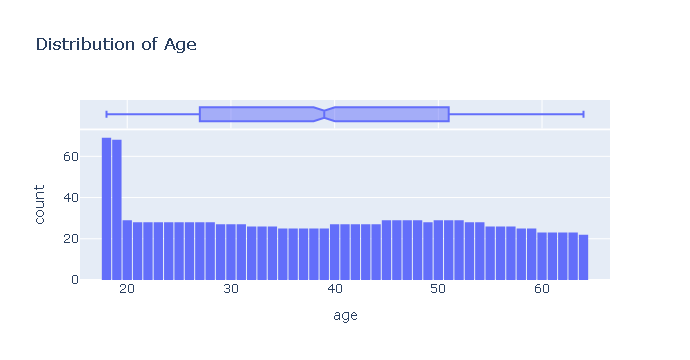

In [ ]:
graph = fig = px.histogram(df,
                  x = 'age',
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Age')
graph.update_layout(bargap = 0.1)
graph.show()

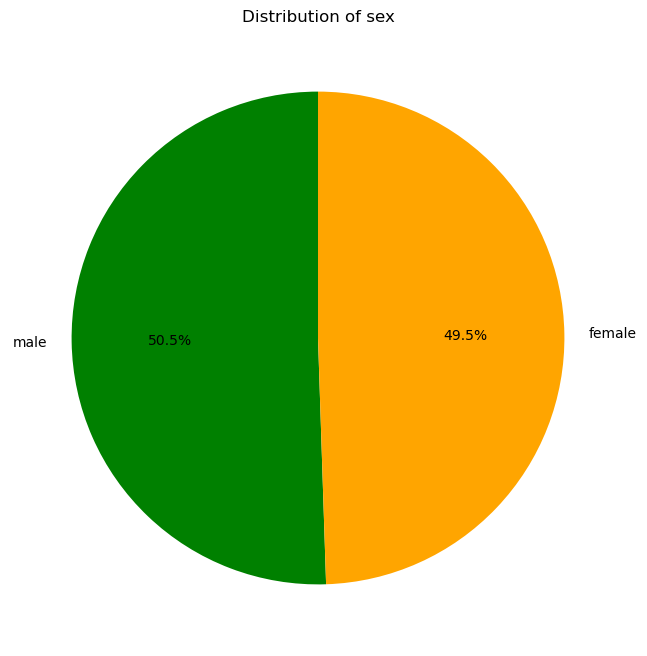

In [ ]:
sex_counts = df['sex'].value_counts()
colors = ['green','orange']
plt.figure(figsize = (8,8))
plt.pie(sex_counts, labels = sex_counts.index,autopct = '%1.1f%%',startangle = 90, colors = colors)
plt.title('Distribution of sex')
plt.show()

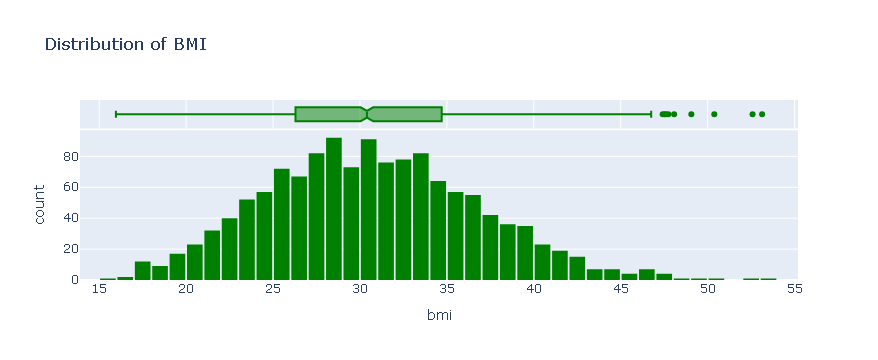

In [ ]:
graph = fig = px.histogram(df,
                  x = 'bmi',
                  marginal = 'box',
                  color_discrete_sequence = ['green'],
                  nbins = 47,
                  title = 'Distribution of BMI')
graph.update_layout(bargap = 0.1)
graph.show()

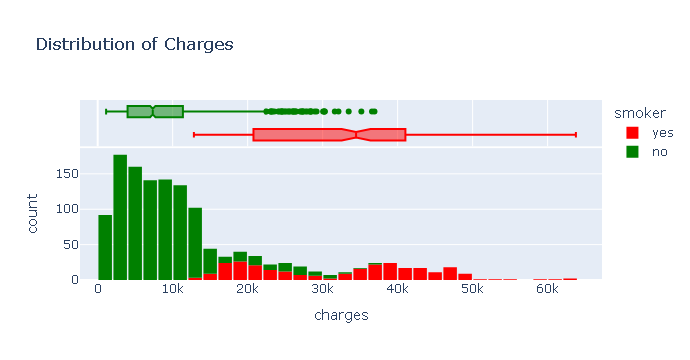

In [ ]:
graph = fig = px.histogram(df,
                  x = 'charges',
                  color = 'smoker', 
                  color_discrete_sequence = ['red','green'],
                 
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Charges')
graph.update_layout(bargap = 0.1)
graph.show()                  

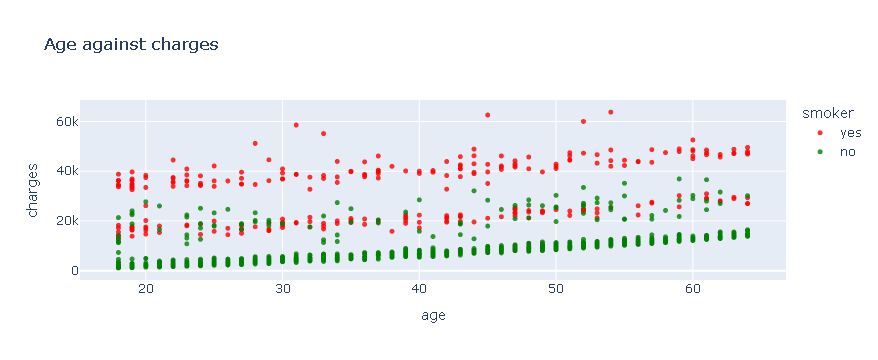

In [ ]:
graph = px.scatter(df,
                  x = 'age',
                  y = 'charges',
                   color = 'smoker',
                   color_discrete_sequence = ['red','green'],
                  opacity = 0.8,
                  hover_data = ['sex'],
                  title = 'Age against charges')
graph.update_traces(marker_size = 5)
graph.show()

                  

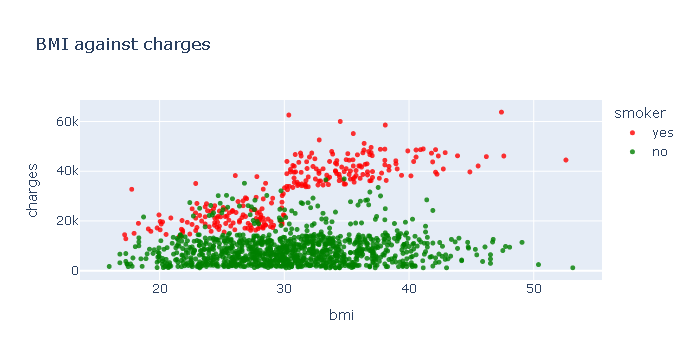

In [ ]:
graph = px.scatter(df,
                  x = 'bmi',
                  y = 'charges',
                   color = 'smoker',
                   color_discrete_sequence = ['red','green'],
                  opacity = 0.8,
                  hover_data = ['sex'],
                  title = 'BMI against charges')
graph.update_traces(marker_size = 5)
graph.show()











In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df['region'] = df['region'].map({
    'southwest': 1,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4
})



In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Independent variables (features)
X = df.drop('charges', axis=1)

# Dependent variable (target)
y = df['charges']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
X_train.shape, X_test.shape


((936, 6), (402, 6))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [ ]:
y_pred[:5]


array([ 8931.42116433,  7070.90670308, 36937.08049605,  9596.99214428,
       27008.35487143])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Model Performance
MAE : 4155.2398430593785
RMSE: 5814.246890069994
R²  : 0.7694415927057694


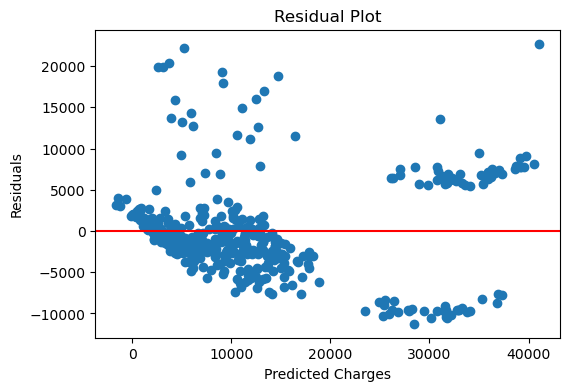

In [ ]:
# Residuals = Actual - Predicted
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coeff_df


,Feature,Coefficient
4,smoker,23620.802521
3,children,424.370166
2,bmi,344.544831
5,region,326.462625
0,age,261.625690
1,sex,-109.647196


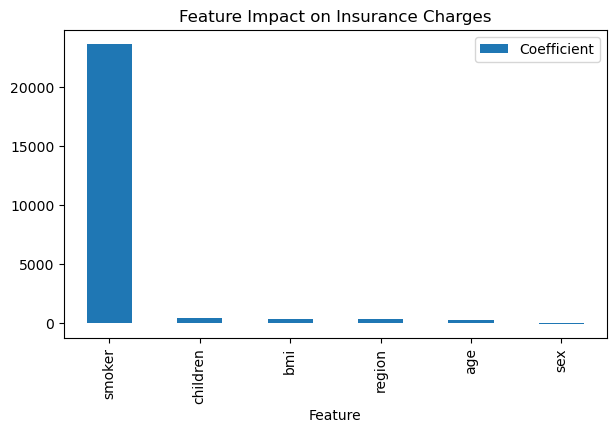

In [ ]:
coeff_df.set_index("Feature").plot(kind="bar", figsize=(7,4))
plt.title("Feature Impact on Insurance Charges")
plt.show()


In [ ]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,2,1629.83350
1336,21,2,25.800,0,0,1,2007.94500


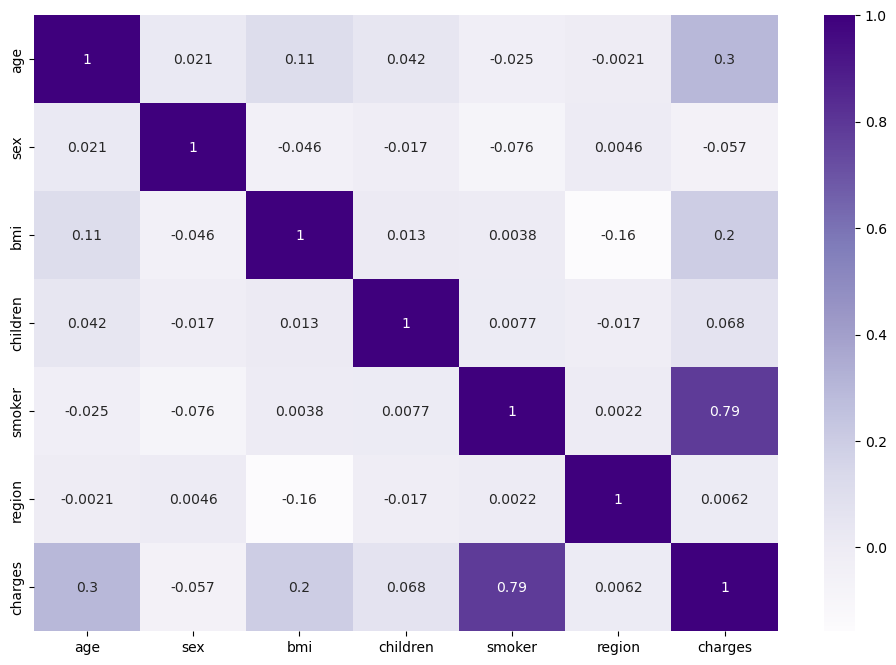

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True, cmap = 'Purples')
plt.show()

# MODEL TRAINING AND TESTING


In [ ]:
X = df[['age','bmi','children','smoker']]
y = df['charges']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, pred)

0.7684636242828375

In [ ]:
test = {'age': 60,'bmi': 23, 'children': 4, 'smoker': 0}
index = [0]
data_frame = pd.DataFrame(test, index)
data_frame


,age,bmi,children,smoker
0,60,23,4,0


In [ ]:
insurance = lr.predict(data_frame)
print('the cost will be {}'.format(insurance))

the cost will be [12642.08049615]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.3, random_state=42
)

lr_poly = LinearRegression()
lr_poly.fit(X_train_p, y_train_p)

y_pred_poly = lr_poly.predict(X_test_p)

print("Polynomial Regression R²:", r2_score(y_test_p, y_pred_poly))


Polynomial Regression R²: 0.8637557014627593


In [ ]:
def predict_insurance(age, sex, bmi, children, smoker, region):
    """
    Predict insurance charges using trained Linear Regression model
    
    sex    : male=1, female=2
    smoker : yes=1, no=0
    region : southwest=1, southeast=2, northwest=3, northeast=4
    """
    data = pd.DataFrame([{
        "age": age,
        "sex": sex,
        "bmi": bmi,
        "children": children,
        "smoker": smoker,
        "region": region
    }])
    
    prediction = lr.predict(data)[0]
    return prediction


In [ ]:
predict_insurance(60, 2, 23, 4, 0, 1)


np.float64(11975.773961388375)